In [14]:
import pyrealsense2 as rs
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import open3d as o3d
import sys


parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
from realsense.realsense import Camera

# single camera

Selected device serial numbers: 145422070656


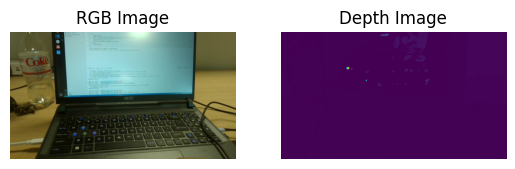

In [15]:
# Enumerate connected RealSense cameras
ctx = rs.context()
devices = ctx.query_devices()
device_serials = [device.get_info(rs.camera_info.serial_number) for device in devices]
device_serials.sort()

# Print selected device serial numbers
print("Selected device serial numbers:", device_serials[0])

rgb_resolution = (1920, 1080)  # RGB resolution (width, height)
depth_resolution = (1280, 720)  # Depth resolution (width, height)

camera = Camera(device_serials[0], rgb_resolution, depth_resolution)

# Delay before shooting (in seconds)
delay_before_shooting = 1

try:
    camera.start()
    time.sleep(delay_before_shooting)  # Introduce delay before shooting
    color_image, depth_image = camera.shoot()
    if color_image is not None and depth_image is not None:
        # show the rgb and depth images
        plt.subplot(1, 2, 1)
        plt.imshow(color_image)
        plt.title('RGB Image')
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(depth_image)
        plt.title('Depth Image')
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to capture images from camera {camera.serial_number}")
finally:
    camera.stop()

# multiple camera

In [16]:
# Enumerate connected RealSense cameras
ctx = rs.context()
devices = ctx.query_devices()
device_serials = [device.get_info(rs.camera_info.serial_number) for device in devices]
device_serials.sort()

# Print selected device serial numbers
print("Selected device serial numbers:", device_serials)

# Directory for saving images
base_dir = '../shoot_test'

rgb_resolution = (1920, 1080)  # RGB resolution (width, height)
depth_resolution = (1280, 720)  # Depth resolution (width, height)

cameras = [Camera(serial_number, rgb_resolution, depth_resolution) for serial_number in device_serials]

# Delay before shooting (in seconds)
delay_before_shooting = 1

try:
    for camera in cameras:
        camera.start()
        time.sleep(delay_before_shooting)  # Introduce delay before shooting
        color_image, depth_image = camera.shoot()
        if color_image is not None and depth_image is not None:
            # Save the images or perform any desired processing here
            camera_dir = os.path.join(base_dir, f'camera_{camera.serial_id}')
            os.makedirs(camera_dir, exist_ok=True)
            timestamp = int(time.time())
            rgb_filename = os.path.join(camera_dir, f'{timestamp}.png')
            depth_filename = os.path.join(camera_dir, f'{timestamp}.npy')
            plt.imsave(rgb_filename, color_image)
            np.save(depth_filename, depth_image)
            print(f"Saved {rgb_filename}")
            print(f"Saved {depth_filename}")
        else:
            print(f"Failed to capture images from camera {camera.serial_number}")
finally:
    for camera in cameras:
        camera.stop()

Selected device serial numbers: ['145422070656', '239722072125']
Saved ../shoot_test/camera_9/1711408844.png
Saved ../shoot_test/camera_9/1711408844.npy
Saved ../shoot_test/camera_10/1711408845.png
Saved ../shoot_test/camera_10/1711408845.npy


# 3d reconstruction

In [17]:
# Enumerate connected RealSense cameras
ctx = rs.context()
devices = ctx.query_devices()
device_serials = [device.get_info(rs.camera_info.serial_number) for device in devices]
device_serials.sort()

# Print selected device serial numbers
print("Selected device serial numbers:", device_serials[0])

rgb_resolution = (1920, 1080)  # RGB resolution (width, height)
depth_resolution = (1280, 720)  # Depth resolution (width, height)

camera = Camera(device_serials[0], rgb_resolution, depth_resolution)

# Delay before shooting (in seconds)
delay_before_shooting = 1

try:
    camera.start()
    time.sleep(delay_before_shooting)  # Introduce delay before shooting
    pcd = camera.get_pointcloud(depth_trunc=1.0)
    # Visualize the point cloud
    o3d.visualization.draw_geometries([pcd])
finally:
    camera.stop()

Selected device serial numbers: 145422070656
